In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_rows', None)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

from mlxtend.frequent_patterns import apriori, association_rules

market_basket_df = pd.read_csv('BigBasketRefined.csv', header=None)
print("successful")


successful


In [2]:
market_basket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8386 entries, 0 to 8385
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8386 non-null   object
 1   1       7846 non-null   object
 2   2       6676 non-null   object
 3   3       5613 non-null   object
 4   4       4603 non-null   object
 5   5       3534 non-null   object
 6   6       2355 non-null   object
 7   7       1255 non-null   object
 8   8       505 non-null    object
 9   9       104 non-null    object
dtypes: object(10)
memory usage: 655.3+ KB


In [3]:
basket_items = []
for index, row in market_basket_df.iterrows():
    cleansed_items = [item for item in row if str(item)!='nan']
    basket_items.append(cleansed_items)
    
basket_items[:3]

[['Other Sauces',
  'Cashews',
  'Namkeen',
  'Sugar',
  'Banana',
  'Sugar Cubes',
  'Other Sweets',
  'Other Rice Products'],
 ['Utensil Scrub Pads',
  'Other Rice Products',
  'Buns & Pavs',
  'Cakes',
  'Other Dals',
  'Boiled Rice'],
 ['Urad Dal', 'Boiled Rice', 'Raisins', 'Chips', 'Other Dals', 'Almonds']]

In [4]:
from mlxtend.preprocessing import TransactionEncoder
tran_encod = TransactionEncoder()
tran_encod_list = tran_encod.fit(basket_items).transform(basket_items)
transaction_df = pd.DataFrame(tran_encod_list, columns=tran_encod.columns_)
transaction_df.head()

,Cookies & Rusk,Foam & Gels,Glue & Tape,Marie & Milk Biscuits,Peelers & Scrapers,After Shave,Agarbatti,Almonds,Aluminium Foil & Cling Wrap,Antiseptics,...,Vanaspati,Veg & Fruit,Vermicelli,Vinegar,Wafers,Washing Bars,Whole Grains,Whole Spices,Womens Deo,Yogurt & Lassi
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
item_count = {}
for col in transaction_df.columns:
    item_count[col] = transaction_df[col].sum()

item_freq_df = pd.DataFrame(data=list(item_count.values()), index=list(item_count.keys()), 
                            columns=['frequency']).sort_values(by='frequency', 
                            ascending=False)
item_freq_df.shape, item_freq_df.head(10)

((221, 1),
                   frequency
 Other Vegetables       3020
 Root Vegetables        2845
 Beans                  2800
 Gourd & Cucumber       2080
 Brinjals               1845
 Other Dals             1731
 Banana                 1729
 Whole Spices           1514
 Organic F&V            1297
 Namkeen                1134)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

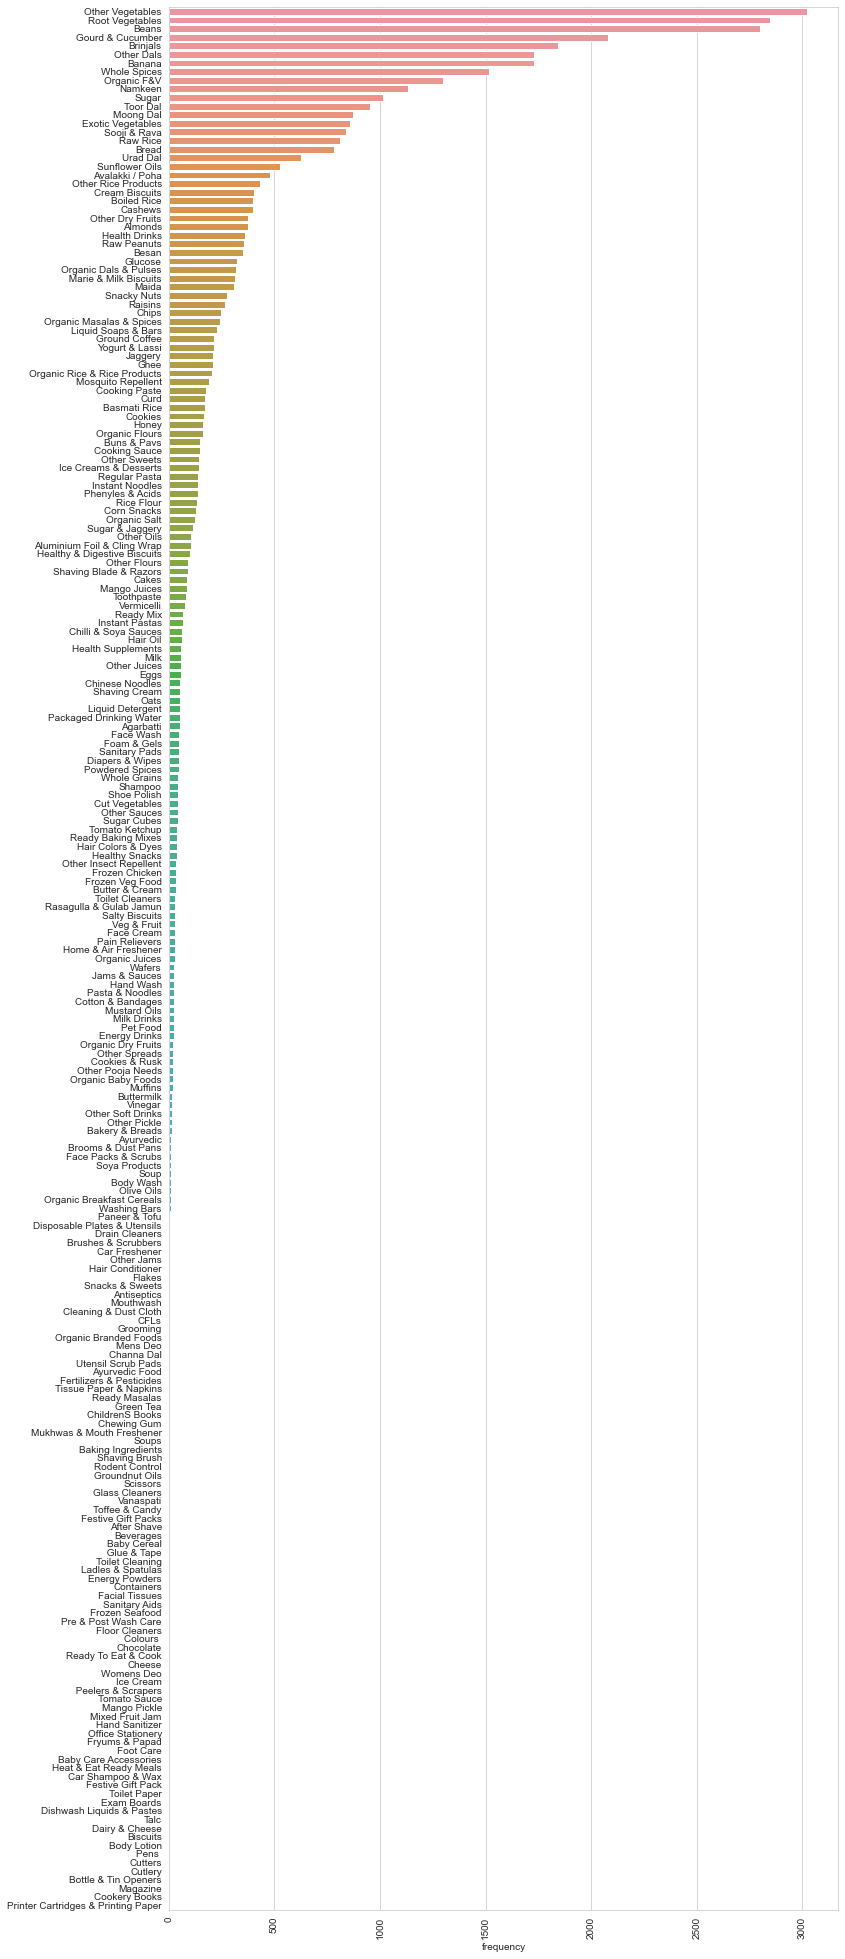

In [6]:
plt.figure(figsize=(12,35))
sns.barplot(y=item_freq_df.index, x=item_freq_df.frequency)
plt.xticks(rotation=90)

### The Above graph shows that people prefer to buy more of vegetables, spices and pulses from Big Basket as compared to products such as cutlery, magazines and newspapers, bathroom need products, electronic products and sweets and snacks.

### Apart from this, we are also able to visualize that there is a decent demand of Organic fruits and vegetables, this shows consumers are getting concious about their health

Out of 8386 Observation in our dataset, 

In [7]:
apriori(transaction_df, min_support=0.1, use_colnames=True)

,support,itemsets
0,0.206177,(Banana)
1,0.333890,(Beans)
2,0.220010,(Brinjals)
3,0.102552,(Exotic Vegetables)
4,0.248032,(Gourd & Cucumber)
5,0.103983,(Moong Dal)
6,0.135225,(Namkeen)
7,0.154663,(Organic F&V)
8,0.206415,(Other Dals)
9,0.360124,(Other Vegetables)


In [8]:
print(f'freq>200: {item_freq_df[item_freq_df.frequency>200].shape[0]} items')
print(f'freq>100: {item_freq_df[item_freq_df.frequency>100].shape[0]} items')
print(f'freq>50: {item_freq_df[item_freq_df.frequency>50].shape[0]} items')

freq>200: 43 items
freq>100: 63 items
freq>50: 84 items


In [9]:
pd.set_option('display.max_rows', 15)
freq_itemset_support = apriori(transaction_df, min_support=0.03, use_colnames=True)
freq_itemset_support

,support,itemsets
0,0.037205,( Marie & Milk Biscuits)
1,0.044598,(Almonds)
2,0.056881,(Avalakki / Poha)
3,0.206177,(Banana)
4,0.333890,(Beans)
...,...,...
106,0.039590,"(Brinjals, Root Vegetables, Gourd & Cucumber)"
107,0.052230,"(Brinjals, Root Vegetables, Other Vegetables)"
108,0.061173,"(Other Vegetables, Root Vegetables, Gourd & Cu..."
109,0.031123,"(Other Dals, Root Vegetables, Other Vegetables)"


In [10]:
overal_association_rules = association_rules(freq_itemset_support, metric="confidence", min_threshold=0.2)
overal_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Beans),(Banana),0.333890,0.206177,0.076079,0.227857,1.105153,0.007239,1.028078
1,(Banana),(Beans),0.206177,0.333890,0.076079,0.368999,1.105153,0.007239,1.055641
2,(Brinjals),(Banana),0.220010,0.206177,0.049249,0.223848,1.085709,0.003888,1.022768
3,(Banana),(Brinjals),0.206177,0.220010,0.049249,0.238866,1.085709,0.003888,1.024775
4,(Banana),(Gourd & Cucumber),0.206177,0.248032,0.053780,0.260844,1.051654,0.002642,1.017333
...,...,...,...,...,...,...,...,...,...
138,"(Beans, Other Vegetables)","(Root Vegetables, Gourd & Cucumber)",0.162294,0.106964,0.034462,0.212344,1.985190,0.017103,1.133789
139,"(Gourd & Cucumber, Other Vegetables)","(Root Vegetables, Beans)",0.132602,0.153709,0.034462,0.259892,1.690811,0.014080,1.143470
140,"(Root Vegetables, Beans)","(Gourd & Cucumber, Other Vegetables)",0.153709,0.132602,0.034462,0.224205,1.690811,0.014080,1.118076
141,"(Root Vegetables, Gourd & Cucumber)","(Beans, Other Vegetables)",0.106964,0.162294,0.034462,0.322185,1.985190,0.017103,1.235891


In [11]:
trans_Other_Vegetables_df = transaction_df.drop(columns=['Other Vegetables'])

freq_itemset_Other_Vegetables_supp = apriori(trans_Other_Vegetables_df, min_support=0.04, use_colnames=True)
freq_itemset_Other_Vegetables_supp

,support,itemsets
0,0.044598,(Almonds)
1,0.056881,(Avalakki / Poha)
2,0.206177,(Banana)
3,0.333890,(Beans)
4,0.041617,(Besan)
...,...,...
51,0.054973,"(Other Dals, Whole Spices)"
52,0.057715,"(Root Vegetables, Whole Spices)"
53,0.046864,"(Brinjals, Beans, Gourd & Cucumber)"
54,0.044479,"(Brinjals, Root Vegetables, Beans)"


In [12]:
Other_Vegetables_assoc_rules = association_rules(freq_itemset_Other_Vegetables_supp, metric="confidence", min_threshold=0.4)
Other_Vegetables_assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Banana),(Root Vegetables),0.206177,0.339256,0.082757,0.401388,1.183143,0.012810,1.103794
1,(Brinjals),(Beans),0.220010,0.333890,0.099809,0.453659,1.358707,0.026350,1.219220
2,(Gourd & Cucumber),(Beans),0.248032,0.333890,0.126043,0.508173,1.521978,0.043228,1.354359
3,(Root Vegetables),(Beans),0.339256,0.333890,0.153709,0.453076,1.356961,0.040434,1.217920
4,(Beans),(Root Vegetables),0.333890,0.339256,0.153709,0.460357,1.356961,0.040434,1.224410
...,...,...,...,...,...,...,...,...,...
11,"(Brinjals, Gourd & Cucumber)",(Beans),0.089793,0.333890,0.046864,0.521912,1.563127,0.016883,1.393280
12,"(Brinjals, Root Vegetables)",(Beans),0.093489,0.333890,0.044479,0.475765,1.424917,0.013264,1.270634
13,"(Brinjals, Beans)",(Root Vegetables),0.099809,0.339256,0.044479,0.445639,1.313578,0.010618,1.191903
14,"(Root Vegetables, Gourd & Cucumber)",(Beans),0.106964,0.333890,0.059504,0.556299,1.666115,0.023790,1.501258


In [13]:
Other_Vegetables_assoc_rules.sort_values('confidence', ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,"(Root Vegetables, Gourd & Cucumber)",(Beans),0.106964,0.333890,0.059504,0.556299,1.666115,0.023790,1.501258
11,"(Brinjals, Gourd & Cucumber)",(Beans),0.089793,0.333890,0.046864,0.521912,1.563127,0.016883,1.393280
2,(Gourd & Cucumber),(Beans),0.248032,0.333890,0.126043,0.508173,1.521978,0.043228,1.354359
12,"(Brinjals, Root Vegetables)",(Beans),0.093489,0.333890,0.044479,0.475765,1.424917,0.013264,1.270634
15,"(Beans, Gourd & Cucumber)",(Root Vegetables),0.126043,0.339256,0.059504,0.472091,1.391548,0.016743,1.251625
...,...,...,...,...,...,...,...,...,...
8,(Gourd & Cucumber),(Root Vegetables),0.248032,0.339256,0.106964,0.431250,1.271164,0.022818,1.161748
6,(Brinjals),(Root Vegetables),0.220010,0.339256,0.093489,0.424932,1.252542,0.018850,1.148985
5,(Brinjals),(Gourd & Cucumber),0.220010,0.248032,0.089793,0.408130,1.645471,0.035223,1.270495
7,(Exotic Vegetables),(Root Vegetables),0.102552,0.339256,0.041498,0.404651,1.192761,0.006706,1.109844


Association rules generated from above data set are : 
Gourd & Cucumber, Root Vegetables -> Beans
Gourd & Cucumber, Brinjals -> Beans
Brinjals, Root vegetables -> Beans
Exotic Vegetables-> Root Vegetables
Banana -> Root Vegetables 
Brinjals -> Gourd & Cucumber
Moong Daal -> Other Dals

Most Sold Item is : Other Vegetables
    Most frequent Items sold with Other Vegetables are :
        1. Root Vegetables, Gourd and Cucumber
        2. Gourd and Cucumber, Brinjals
        3. Beans and Brinjals
        4. Moong Daal
        5. Exotic Vegetables

In [14]:
%timeit apriori(transaction_df,min_support=0.1)

7.73 ms ± 224 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
